In [39]:
import pandas as pd
import numpy as np
import re

In [40]:
%pwd

'C:\\Users\\baudant\\OneDrive - BEFIVE\\italians_do_it_better\\M_MERGE'

In [41]:
#################################################
# 0) FUNCTIONS                                  #
#################################################

In [42]:
import sys
sys.path.append('../')
from func import *

#DEFINED FUNCTIONS :
    
#unique_clean(data,col,pr=0)

#df_with_text(data,col,text)
#text_in_df(data,col,text)
#two_text_in_df(data,col,text1,text2)
#two_text_in_df(data,col,text1,text2='')

#values_U_not_nan(data,col_name)
#not_nan_get_values(data,col_name,pr=0)
#not_nan_get_index(data, col_name, pr=0)
#nan_get_index(data, col_name, pr=0)

#is_not_decimal(a)
#is_not_13(a)
#split_text_left(text_to_split,text)
#split_item_left(st)
#split_item_right(st)

#find_weight(text):     #s = re.compile('\d+G') extracts '210G'

In [43]:
#################################################
#   1) O_PROD_KW from Open food Facts           #
#  (keywords + categroy + Nielsen EAN13)        #
#################################################

In [44]:
#Import from openFF
df_O_PROD = pd.read_csv('../O_OPENFF/output_data/O_products_KW.csv', index_col=0)

df_O_PROD['EAN13'] = df_O_PROD['EAN13'].astype(str)

#Creation of a column with ones to count product matches with groupby method
df_O_PROD['COUNT'] = 1
df_O_PROD['date_modified'] = df_O_PROD['interface_version_modified'].apply(lambda row : split_text_left(row, '.'))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
df_O_PROD.shape

(17648, 45)

In [18]:
#Adding O_ in front of each column name of df_O_PROD
if not df_O_PROD.columns[0][0:2] == 'O_' :
    for c in df_O_PROD.columns :
        df_O_PROD.rename(columns={c : 'O_' + c}, inplace=True)

In [19]:
df_O_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17648 entries, 0 to 17647
Data columns (total 45 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   O_EAN13                                                  17648 non-null  object 
 1   O_product_name_fr                                        16650 non-null  object 
 2   O_product_name                                           17577 non-null  object 
 3   O_brands                                                 13911 non-null  object 
 4   O_brands_tags_str                                        14653 non-null  object 
 5   O_brands_tags                                            14653 non-null  object 
 6   O_serving_size                                           2465 non-null   object 
 7   O_serving_quantity                                       2465 non-null   float64
 8   O_countries_hierarchy     

In [20]:
df_O_PROD.head()

,O_EAN13,O_product_name_fr,O_product_name,O_brands,O_brands_tags_str,O_brands_tags,O_serving_size,O_serving_quantity,O_countries_hierarchy,O_cities_tags,...,O_sugars_100g,O_fruits_vegetables_nuts_estimate_from_ingredients_100g,O_proteins_100g,O_sodium_100g,O_salt_100g,O_nutrition_score_fr_100g,O_fiber_100g,O_nova_group_100g,O_COUNT,O_date_modified
0,000000001231,Rillettes de sanglier au Chouchen,Rillettes de sanglier au Chouchen,Le Bois Jumel,['le-bois-jumel'],['le-bois-jumel'],NaN,NaN,['en:france'],NaN,...,0.0,NaN,16.0,0.64,1.6,21.0,NaN,NaN,1,20150316
1,0000000012256,Salade penne pesto,Salade penne pesto,NaN,NaN,NaN,NaN,NaN,['en:france'],NaN,...,0.9,NaN,3.2,0.08,0.2,NaN,NaN,NaN,1,20150316
2,0000069162176,Quenelles de brochet sauce Nantua,Quenelles de brochet sauce Nantua,Bofrost,['bofrost'],['bofrost'],NaN,NaN,['en:france'],NaN,...,0.6,0.0,4.6,1.96,4.9,16.0,0.5,4.0,1,20150316
3,0000087157215,Tomato Ketchup Heinz Ouverture En Bas,Tomato Ketchup Heinz Ouverture En Bas,Heinz,['heinz'],['heinz'],NaN,NaN,['en:france'],NaN,...,22.8,0.0,1.2,0.72,1.8,13.0,NaN,3.0,1,20150316
4,00001801051082969226,Ketchup Amora,Ketchup Amora,Amora,['amora'],['amora'],NaN,NaN,['en:france'],NaN,...,21.0,NaN,11.0,0.72,1.8,12.0,NaN,NaN,1,20150316


In [19]:
###############################################################
# 2) Merge with N_PROD from Nielsen                           #
#    and I_category_list with Italians labelling              #
###############################################################

In [20]:
###################################################
# 2.1) load N_PROD from Nielsen (select MARKET and KPI) 

In [21]:
df_N_PROD=pd.read_csv('../N_NIELSEN/output_data/N_PROD_FR_Ventes_Valeur.csv')
print('shape :',df_N_PROD.shape)
df_N_PROD.columns

shape : (1443, 20)


Index(['Unnamed: 0', 'index', 'N_EAN13', 'N_MARQUE', 'N_SAME_PRODUCT',
       'N_GAMME', 'N_RECETTES', 'N_ORGANIC', 'N_FORMAT', 'N_WEIGHT_num',
       'N_EMBALLAGE', 'N_COMPTE', 'N_STD/PROMO', 'N_Ventes_Valeur_2019',
       'N_Ventes_Valeur_2018', 'N_ITEM', 'N_NIELSEN_DESCRIPTION',
       'N_INITIAL_INDEX', 'N_CATEGORY', 'N_COUNT'],
      dtype='object')

In [14]:
###################################################
# 2.2) load labelled data from Italians do it better (fichier Marine)

df_I_PROD=pd.read_csv('../I_ITALIANS/Categories_produits_italians.xlsx',header=4)
print('shape :',df_I_PROD.shape)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 1: invalid start byte

In [ ]:
#CLEANING UP COLUMNS
for col in column_str :
    df_I_PROD[col] = df_I_PROD[col].str.strip()
    df_I_PROD[col] = df_I_PROD[col].str.replace('\s', '_', regex=True)
    df_I_PROD[col] = df_I_PROD[col].str.replace('_+', '_', regex=True)
df_N_ALL.columns

In [ ]:
#Adding I_ in front of each column name 
if not df_I_PROD.columns[0][0:2] == 'I_' :
    for c in df_I_PROD.columns :
        df_I_PROD.rename(columns={c : 'I_' + c}, inplace=True)

In [ ]:
df_LABELS=df_I_PROD[['EAN13','CATEGORIE PRODUIT']]

In [ ]:
###################################################
# 2.3) Merge labels into N_PROD

In [ ]:
###############################################################
# 3) EXTRACT PROD_SEL with all brands to follow               #
###############################################################

In [ ]:
###################################################
# 3.1) Brands to follow (Nielsen + Italians selection)

In [23]:
#list of BRANDS in df_O_PROD
O_brands_U = pd.DataFrame(unique_clean(df_O_PROD,'O_brands'), columns =['O_brands'])
O_brands_U


number of  O_brands  unique (non null) values:  4318
<class 'list'> 



,O_brands
0,Le Bois Jumel
1,Bofrost
2,Heinz
3,Amora
4,Comme J’Aime
...,...
4313,Ayam brand
4314,"Yeo's,Yeo Hiap Seng (Malaysia) Bhd"
4315,URSINI
4316,Tradilège


In [24]:
#list of BRANDS in df_O_PROD
O_brands_tags_str_U = pd.DataFrame(unique_clean(df_O_PROD,'O_brands_tags_str'), columns =['O_brands_tags_str'])
O_brands_tags_str_U


number of  O_brands_tags_str  unique (non null) values:  3428
<class 'list'> 



,O_brands_tags_str
0,['le-bois-jumel']
1,['bofrost']
2,['heinz']
3,['amora']
4,[]
...,...
3423,['sanitarium']
3424,['lingham-s']
3425,['ayam-brand']
3426,"['yeo-s', 'yeo-hiap-seng-malaysia-bhd']"


In [25]:
#list of BRANDS in df_O_PROD
O_brands_tags_U = pd.DataFrame(unique_clean(df_O_PROD,'O_brands_tags'), columns =['O_brands_tags'])
O_brands_tags_U


number of  O_brands_tags  unique (non null) values:  3428
<class 'list'> 



,O_brands_tags
0,['le-bois-jumel']
1,['bofrost']
2,['heinz']
3,['amora']
4,[]
...,...
3423,['sanitarium']
3424,['lingham-s']
3425,['ayam-brand']
3426,"['yeo-s', 'yeo-hiap-seng-malaysia-bhd']"


In [37]:
#list of BRANDS in df_N_PROD (followed bu Nielsen, including 'AUT MQ')
N_brands_U = pd.DataFrame(unique_clean(df_N_PROD,'N_MARQUE'), columns =['N_MARQUE'])
N_brands_U


number of  N_MARQUE  unique (non null) values:  31
<class 'list'> 



,N_MARQUE
0,AUT_MQ
1,MDD
2,BARILLA
3,FLORELLI
4,ITALIANS_DO_IT_BETTER
5,JARDIN_BIO
6,MQ_FAB_1_PRX
7,SACLA
8,SUZY_WAN
9,UNC_BENS


In [33]:
#list of BRANDS to be specifically followed by ITALIANS
# may be in in df_N_PROD (in 'AUT MQ') or not
I_brands= [['u'],
['auchan'],
['carrefour'],
['casino'],
['leader-price'],
['cora'],
['rustica', 'marque-repere'],
['belle-france'],
['monoprix'],
['bouton-d-or','intermarché'], #intermarché ajouté à la main par Aurélie
['la-vie-claire'],
['delhaize'],
['prosain'],
['franprix'],
['turini', 'marque-repere'],
['u-saveurs', 'u'],
['monoprix-gourmet', 'monoprix'],
['leader-price', 'dlp-distribution-leader-price', 'groupe-casino'],
['carrefour-bio', 'carrefour'],
['marque-repere', 'rustica'],
['reflets-de-france'],
['le-conserve-della-nonna'],
['monoprix-bio', 'monoprix'],
['turini', 'marque-repere', 'scamark-filiale-e-leclerc'],
['carrefour', 'cmi-carrefour-marchandises-internationales', 'groupe-carrefour'],
['casino-delices', 'casino'],
['casino-bio'],
['top-budget'],
['carrefour-bio'],
['biocoop'],
['garofalo'],
['monique-ranou'],
['marche-franprix', 'franprix'],
['itineraire-des-saveurs','intermarché'], #intermarché ajouté à la main par Aurélie
['nonna-bruna'],
['monoprix-gourmet'],
['fiorini', 'les-mousquetaires'],
['ursini'],
['les-delices-de-belle-france', 'belle-france'],
['marque-repere', 'turini'],
['bonneterre'],
['auchan-bio', 'auchan', 'l-oiseau', 'auchan-production', 'groupe-auchan'],
['petti']]

In [36]:
#List of all brand to extract from O_PROD_Keywords
BRANDS_to_follow = list(I_brands) + list(N_brands_U)
BRANDS_to_follow

[['u'],
 ['auchan'],
 ['carrefour'],
 ['casino'],
 ['leader-price'],
 ['cora'],
 ['rustica', 'marque-repere'],
 ['belle-france'],
 ['monoprix'],
 ['bouton-d-or', 'intermarché'],
 ['la-vie-claire'],
 ['delhaize'],
 ['prosain'],
 ['franprix'],
 ['turini', 'marque-repere'],
 ['u-saveurs', 'u'],
 ['monoprix-gourmet', 'monoprix'],
 ['leader-price', 'dlp-distribution-leader-price', 'groupe-casino'],
 ['carrefour-bio', 'carrefour'],
 ['marque-repere', 'rustica'],
 ['reflets-de-france'],
 ['le-conserve-della-nonna'],
 ['monoprix-bio', 'monoprix'],
 ['turini', 'marque-repere', 'scamark-filiale-e-leclerc'],
 ['carrefour',
  'cmi-carrefour-marchandises-internationales',
  'groupe-carrefour'],
 ['casino-delices', 'casino'],
 ['casino-bio'],
 ['top-budget'],
 ['carrefour-bio'],
 ['biocoop'],
 ['garofalo'],
 ['monique-ranou'],
 ['marche-franprix', 'franprix'],
 ['itineraire-des-saveurs', 'intermarché'],
 ['nonna-bruna'],
 ['monoprix-gourmet'],
 ['fiorini', 'les-mousquetaires'],
 ['ursini'],
 ['les-d

In [38]:
###################################################
# 3.2) Select brands to follow in  O_PROD_SEL

In [ ]:
df_PROD_BRANDS_SEL = df_O_PROD[BRANDS_to_follow]

In [ ]:
###################################################
# 3.3) Merge O_PROD_SEL with N_PROD_LABEL

In [227]:
df_M_PROD_SEL = df_PROD_BRANDS_SEL.merge(df_N_PROD_LABEL, left_on='O_EAN13', right_on='N_EAN13', how='left')
df_M_PROD.shape

(1443, 64)

In [230]:
#check total of sales value = 343 809 410,40 €
#check total of sales volume = 84.991.284,70
df_M_PROD_SEL['N_Ventes_Valeur_2019'].sum()

343809410.40000004

In [ ]:
###############################################################
# 4) CEHCK AND SAVE FILE                                      #
###############################################################

In [231]:
#------------------------------------------------
#SAVE M_PROD_SEL
M_PROD_SEL.to_csv('output_data/M_PROD_SEL.csv')
M_PROD_SEL.to_excel('output_data/M_PROD_SEL.xlsx')

In [ ]:
###############################################################
# 5) TO BE DELETED  ???                                       #
###############################################################

In [212]:
#Select columns
new_cols = ['N_EAN13', 'N_MARQUE','N_SAME_PRODUCT', 'N_GAMME','N_RECETTES', 'N_ORGANIC', 'N_FORMAT','N_WEIGHT_num', 'N_EMBALLAGE', 
     'N_COMPTE', 'N_STD/PROMO', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018', 'N_ITEM',
    'N_NIELSEN_DESCRIPTION', 'N_INITIAL_INDEX', 'N_CATEGORY']

df_N_PROD = df_N_PROD.loc[:, new_cols]
#df_N_PROD.reset_index(inplace=True)
df_N_PROD['N_COUNT'] = 1

In [220]:
#reset index of df_N_prod with final rows
df_N_PROD.reset_index(inplace=True)

In [221]:
# Number of rows per brand
df_N_PROD_by_BRAND = df_N_PROD[[ 'N_MARQUE','N_COUNT','N_Ventes_Valeur_2019','N_Ventes_Valeur_2018']].groupby(by='N_MARQUE').sum().sort_values(by='N_Ventes_Valeur_2019', ascending=False)
df_N_PROD_by_BRAND['BRAND'] = df_N_PROD_by_BRAND.index.copy()
df_N_PROD_by_BRAND.reset_index()

,N_MARQUE,N_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018,BRAND
0,PANZANI,179,110530977.0,110404242.2,PANZANI
1,MDD,9,103328156.2,96784464.6,MDD
2,BARILLA,79,60044389.8,53562429.8,BARILLA
3,SACLA,98,18916645.6,19612905.1,SACLA
4,ZAPETTI_BUITONI,95,14282239.4,14628922.3,ZAPETTI_BUITONI
5,HEINZ,61,10337632.8,11089374.8,HEINZ
6,AUT_MQ,667,7864709.0,8203665.3,AUT_MQ
7,JARDIN_BIO,33,6930299.1,5999005.3,JARDIN_BIO
8,FLORELLI,38,2109366.9,2201410.6,FLORELLI
9,ITALIANS_DO_IT_BETTER,19,1842765.8,1335705.4,ITALIANS_DO_IT_BETTER


In [222]:
df_N_PROD_by_BRAND.to_excel('vente_valeur_by_BRAND.xlsx')

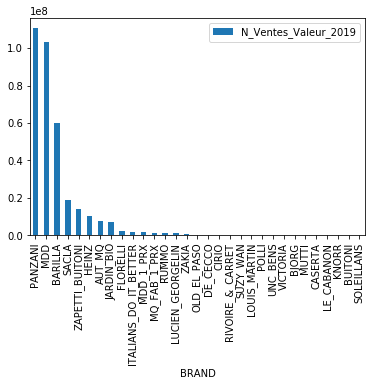

In [223]:
df_N_PROD_by_BRAND.plot.bar(x='BRAND', y='N_Ventes_Valeur_2019')

In [232]:
df_M_PROD.tail(10)

,index,N_EAN13,N_MARQUE,N_SAME_PRODUCT,N_GAMME,N_RECETTES,N_ORGANIC,N_FORMAT,N_WEIGHT_num,N_EMBALLAGE,...,O_sugars_100g,O_fruits_vegetables_nuts_estimate_from_ingredients_100g,O_proteins_100g,O_sodium_100g,O_salt_100g,O_nutrition_score_fr_100g,O_fiber_100g,O_nova_group_100g,O_COUNT,O_date_modified
1433,3063,3038352871303,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,8.1,50.321429,2.7,1.12000,2.8000,9.0,2.7,4.0,1.0,20120622
1434,3064,3038359002335,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,8.1,50.000000,2.7,1.12000,2.8000,9.0,2.7,4.0,1.0,20130323
1435,3065,3038359004544,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,9.1,50.000000,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0,20150316
1436,3066,3038359008603,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,220,TUB,...,9.1,49.750000,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0,20150316
1437,3067,3038359004551,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20150316
1438,3068,3038359002823,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,8.1,NaN,2.7,1.12000,2.8000,NaN,NaN,NaN,1.0,20150316
1439,3069,3038359008498,PANZANI,PANZANI | LEGUMES | TOM_CUI_A_L'ORIGAN | TUB |...,LEGUMES,TOM_CUI_A_L'ORIGAN,NON_BIO,PF,180,TUB,...,10.0,49.000000,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0,20150316
1440,3070,3038359005657,PANZANI,PANZANI | PESTO | PESTO_VERD | TUB | NON_BIO,PESTO,PESTO_VERD,NON_BIO,PF,160,TUB,...,6.1,0.000000,4.4,1.28000,3.2000,13.0,2.5,4.0,1.0,20150316
1441,3072,3038359001413,ZAKIA,ZAKIA | LEGUMES | TOMATE_PIMENTE | TUB | NON_BIO,LEGUMES,TOMATE_PIMENTE,NON_BIO,PF,180,TUB,...,8.1,50.050000,2.7,1.12000,2.8000,NaN,2.7,4.0,1.0,20150316
1442,3074,3021690021851,ZAPETTI_BUITONI,ZAPETTI_BUITONI | LEGUMES | NATURE | TUB | NON...,LEGUMES,NATURE,NON_BIO,PF,150,TUB,...,7.1,87.000000,1.7,0.56896,1.4224,1.0,1.9,4.0,1.0,20120622


In [233]:
############################################
# 4.2) Analysis of missing N_EAN13 in O_PROD

In [234]:
#--------------------------------------------
#     CREATION OF df_M_SAME_PROD
#--------------------------------------------
# columns kept must be sumable

df_M_SAME_PROD = df_M_PROD[['N_SAME_PRODUCT', 'N_COUNT', 'O_COUNT', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018']].groupby(['N_SAME_PRODUCT']).sum().sort_values(by='N_Ventes_Valeur_2019', ascending=False)
df_M_SAME_PROD['MISSING_COUNT'] = df_M_SAME_PROD['N_COUNT'].astype(int) - df_M_SAME_PROD['O_COUNT'].astype(int)
df_M_SAME_PROD= df_M_SAME_PROD[['N_COUNT', 'O_COUNT','MISSING_COUNT', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018']]
df_M_SAME_PROD.sort_values(by='N_Ventes_Valeur_2019', ascending=False)

,N_COUNT,O_COUNT,MISSING_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018
N_SAME_PRODUCT,,,,,
MDD | SAUCES_POUR_FECULENTS | | POT |,1,0.0,1,94370200.5,88010805.0
PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | NON_BIO,26,19.0,7,18522875.3,28628441.5
PANZANI | LEGUMES | PROVENCALE | POT | NON_BIO,17,10.0,7,11724186.2,11559762.7
BARILLA | PESTO | PESTO_VERD | POT | NON_BIO,4,3.0,1,11224787.3,10219195.7
PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,6,6.0,0,10511586.3,10266481.1
...,...,...,...,...,...
AUT_MQ | SCE_CLAS | ONCTUEUSE_AU_RIZ | POT | BIO,1,0.0,1,0.0,0.0
AUT_MQ | SCE_CLAS | NAPOLITAIN | POT | NON_BIO,1,0.0,1,0.0,4.3
AUT_MQ | SCE_CLAS | MELANGE_5_BAIES | DOY_PAC | NON_BIO,1,0.0,1,0.0,12.1


In [235]:
df_M_SAME_PROD.shape

(782, 5)

In [236]:
df_M_SAME_PROD_by_brand = df_M_PROD[['N_MARQUE', 'N_COUNT', 'O_COUNT', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018']].groupby(['N_MARQUE']).sum().sort_values(by='N_Ventes_Valeur_2019', ascending=False)
df_M_SAME_PROD_by_brand['PERCENT_FOUND']=round(df_M_SAME_PROD_by_brand['O_COUNT']/df_M_SAME_PROD_by_brand['N_COUNT']*100)
print(df_M_SAME_PROD_by_brand['O_COUNT'].sum())
df_M_SAME_PROD_by_brand

1103.0


,N_COUNT,O_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018,PERCENT_FOUND
N_MARQUE,,,,,
PANZANI,179,140.0,110530977.0,110404242.2,78.0
MDD,9,0.0,103328156.2,96784464.6,0.0
BARILLA,79,62.0,60044389.8,53562429.8,78.0
SACLA,98,94.0,18916645.6,19612905.1,96.0
ZAPETTI_BUITONI,95,50.0,14282239.4,14628922.3,53.0
HEINZ,61,49.0,10337632.8,11089374.8,80.0
AUT_MQ,667,488.0,7864709.0,8203665.3,73.0
JARDIN_BIO,33,28.0,6930299.1,5999005.3,85.0
FLORELLI,38,38.0,2109366.9,2201410.6,100.0


In [237]:
df_M_SAME_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, MDD | SAUCES_POUR_FECULENTS |  | POT |  to ZAPETTI_BUITONI | PESTO | PESTO_VERD | DOSE | NON_BIO
Data columns (total 5 columns):
N_COUNT                 782 non-null int64
O_COUNT                 782 non-null float64
MISSING_COUNT           782 non-null int64
N_Ventes_Valeur_2019    782 non-null float64
N_Ventes_Valeur_2018    782 non-null float64
dtypes: float64(3), int64(2)
memory usage: 36.7+ KB


In [238]:
#SAVE M_SAME_PROD
df_M_SAME_PROD.to_csv('output_data/M_SAME_PROD_N_EAN13.csv')
df_M_SAME_PROD.to_excel('output_data/M_SAME_PROD_N_EAN13.xlsx')

In [281]:
#-----------------------------------------------------------
#           CREATION OF df_M_SAME_PROD_MISSING 
#          (totally missing in OPEN FOOD FACTS)
#   !!!!! ATTENTION TO 'AUT MQ' (other brands)  !!!!!!!!!!
#-----------------------------------------------------------

df_M_SAME_PROD_MISSING = df_M_SAME_PROD[df_M_SAME_PROD['O_COUNT'] == 0].sort_values(by='N_Ventes_Valeur_2019',ascending=False)
df_M_SAME_PROD_MISSING.shape

(108, 5)

In [282]:
df_M_SAME_PROD_MISSING.head(20)

,N_COUNT,O_COUNT,MISSING_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018
N_SAME_PRODUCT,,,,,
MDD | SAUCES_POUR_FECULENTS | | POT |,1,0.0,1,94370200.5,88010805.0
MDD | SAUCES_POUR_FECULENTS | | BTE_FER |,1,0.0,1,4286886.3,4358804.4
MDD | SAUCES_POUR_FECULENTS | | TUB |,1,0.0,1,2102213.2,2184243.2
MDD_1_PRX | SAUCES_POUR_FECULENTS | | POT |,1,0.0,1,1688258.1,1750841.1
MDD | AUT_SCE | | POT |,1,0.0,1,1408037.2,1310021.9
MDD | SAUCES_POUR_FECULENTS | | BRIC |,1,0.0,1,424991.0,320040.0
MDD | SAUCES_POUR_FECULENTS | | FLA_PLAS |,1,0.0,1,286847.6,116514.8
MDD | SAUCES_POUR_FECULENTS | | DOY_PAC |,1,0.0,1,241084.2,333957.1
MDD | AUT_SCE | | BRIC |,1,0.0,1,139057.0,0.0


In [290]:
df_M_SAME_PROD_MISSING['N_COUNT'].unique()

array([1, 2])

In [295]:
#SAVE M_SAME_PROD_MISSING
df_M_SAME_PROD_MISSING.to_csv('output_data/M_SAME_PROD_N_EAN13_MISSING.csv')
df_M_SAME_PROD_MISSING.to_excel('output_data/M_SAME_PROD_N_EAN13_MISSING.xlsx')

In [292]:
print('sales of same_products with no match in OPENFF:', round(df_M_SAME_PROD_MISSING['N_Ventes_Valeur_2019'].sum(),0),'€')
print('number of same_products with no match in OPENFF:', round(df_M_SAME_PROD_MISSING['N_COUNT'].count()))
print('max sales of same_product with no match in OPENFF:', round(df_M_SAME_PROD_MISSING['N_Ventes_Valeur_2019'].max(),0),'€')

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# resultat trompeur car 
# - pour les marques dans 'AUT MQ' la correspondance n'est pas bonne
# - pour les MDD il ne peut y avoir de match (pas de EAN13 dans NIELSEN opur les MDD
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

sales of same_products with no match in OPENFF: 105258575.0 €
number of same_products with no match in OPENFF: 108
max sales of same_product with no match in OPENFF: 94370200.0 €


In [293]:
#
df_M_SAME_PROD_MISSING[['N_Ventes_Valeur_2019', 'N_COUNT']].sum()

N_Ventes_Valeur_2019    105258575.3
N_COUNT                       112.0
dtype: float64

In [294]:
df_M_SAME_PROD_MISSING=df_M_SAME_PROD_MISSING.sort_values(by='N_Ventes_Valeur_2019',ascending=False).reset_index().head(15)